<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-house-prices:-a-regression-example" data-toc-modified-id="Predicting-house-prices:-a-regression-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predicting house prices: a regression example</a></span><ul class="toc-item"><li><span><a href="#The-Boston-Housing-Price-dataset" data-toc-modified-id="The-Boston-Housing-Price-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The Boston Housing Price dataset</a></span></li><li><span><a href="#Preparing-the-data" data-toc-modified-id="Preparing-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Preparing the data</a></span></li><li><span><a href="#Building-our-network" data-toc-modified-id="Building-our-network-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Building our network</a></span></li><li><span><a href="#Validating-our-approach-using-K-fold-validation" data-toc-modified-id="Validating-our-approach-using-K-fold-validation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Validating our approach using K-fold validation</a></span></li><li><span><a href="#Wrapping-up" data-toc-modified-id="Wrapping-up-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Wrapping up</a></span></li></ul></li></ul></div>

In [26]:
import keras
keras.__version__

'2.4.3'

3.6　预测房价：回归问题

# Predicting house prices: a regression example

This notebook contains the code samples found in Chapter 3, Section 6 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----


In our two previous examples, we were considering classification problems, where the goal was to predict a single discrete label of an 
input data point. Another common type of machine learning problem is "regression", which consists of predicting a continuous value instead 
of a discrete label. For instance, predicting the temperature tomorrow, given meteorological data, or predicting the time that a 
software project will take to complete, given its specifications.

Do not mix up "regression" with the algorithm "logistic regression": confusingly, "logistic regression" is not a regression algorithm, 
it is a classification algorithm.

前面两个例子都是分类问题，其目标是预测输入数据点所对应的单一离散的标签。另一种
常见的机器学习问题是回归问题，它预测一个连续值而不是离散的标签，例如，根据气象数据
预测明天的气温，或者根据软件说明书预测完成软件项目所需要的时间。 
---
注意 不要将回归问题与 logistic 回归算法混为一谈。令人困惑的是，logistic 回归不是回归算法，
而是分类算法。

## The Boston Housing Price dataset


We will be attempting to predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points about the 
suburb at the time, such as the crime rate, the local property tax rate, etc.

The dataset we will be using has another interesting difference from our two previous examples: it has very few data points, only 506 in 
total, split between 404 training samples and 102 test samples, and each "feature" in the input data (e.g. the crime rate is a feature) has 
a different scale. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, 
others between 0 and 100...

Let's take a look at the data:

3.6.1　波士顿房价数据集  
本节将要预测 20 世纪 70 年代中期波士顿郊区房屋价格的中位数，已知当时郊区的一些数
据点，比如犯罪率、当地房产税率等。本节用到的数据集与前面两个例子有一个有趣的区别。
它包含的数据点相对较少，只有 506 个，分为 404 个训练样本和 102 个测试样本。输入数据的
每个特征（比如犯罪率）都有不同的取值范围。例如，有些特性是比例，取值范围为0~1,  
有的取值范围为 1~12,还有的取值范围为 0~100，等等。    
我们来看一下数据。

In [27]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [28]:
train_data.shape

(404, 13)

In [29]:
test_data.shape

(102, 13)


As you can see, we have 404 training samples and 102 test samples. The data comprises 13 features. The 13 features in the input data are as 
follow:

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

The targets are the median values of owner-occupied homes, in thousands of dollars:

如你所见，我们有 404 个训练样本和 102 个测试样本，每个样本都有 13 个数值特征，比如
人均犯罪率、每个住宅的平均房间数、高速公路可达性等。  

目标是房屋价格的中位数，单位是千美元。

In [30]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13


The prices are typically between \$10,000 and \$50,000. If that sounds cheap, remember this was the mid-1970s, and these prices are not 
inflation-adjusted.

房价大都在 10 000~50 000 美元。如果你觉得这很便宜，不要忘记当时是 20 世纪 70 年代中
期，而且这些价格没有根据通货膨胀进行调整。

## Preparing the data


It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to 
automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal 
with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we 
will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a 
unit standard deviation. This is easily done in Numpy:

3.6.2　准备数据  
将取值范围差异很大的数据输入到神经网络中，这是有问题的。网络可能会自动适应这种
取值范围不同的数据，但学习肯定变得更加困难。对于这种数据，普遍采用的最佳实践是对每
个特征做标准化，即对于输入数据的每个特征（输入数据矩阵中的列），减去特征平均值，再除
以标准差，这样得到的特征平均值为 0，标准差为 1。用 Numpy 可以很容易实现标准化。

In [31]:
mean = train_data.mean(axis=0) #(axis=0):y轴
train_data -= mean #train_data=train_data-mean
std = train_data.std(axis=0)
train_data /= std #train_data=train_data/std

#注意：测试集也适用训练集的mean,std
test_data -= mean
test_data /= std

In [32]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [33]:
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])


Note that the quantities that we use for normalizing the test data have been computed using the training data. We should never use in our 
workflow any quantity computed on the test data, even for something as simple as data normalization.

## Building our network


Because so few samples are available, we will be using a very small network with two 
hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using 
a small network is one way to mitigate overfitting.

3.6.3　构建网络   
由于样本数量很少，我们将使用一个非常小的网络，其中包含两个隐藏层，每层有 64 个单
元。一般来说，训练数据越少，过拟合会越严重，而较小的网络可以降低过拟合。

In [19]:
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    #因为需要将同一个模型多次实例化，
    #所以用一个函数来构建模型
    model = models.Sequential()
    # 训练集过少，神经网络不要太大，不然神经网络把所有东西都背下来，导致过拟合。
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) #回归使用mse，
    #回归问题metrics使用mae：误差绝对值相加/mean
    return model


Our network ends with a single unit, and no activation (i.e. it will be linear layer). 
This is a typical setup for scalar regression (i.e. regression where we are trying to predict a single continuous value). 
Applying an activation function would constrain the range that the output can take; for instance if 
we applied a `sigmoid` activation function to our last layer, the network could only learn to predict values between 0 and 1. Here, because 
the last layer is purely linear, the network is free to learn to predict values in any range.

Note that we are compiling the network with the `mse` loss function -- Mean Squared Error, the square of the difference between the 
predictions and the targets, a widely used loss function for regression problems.

We are also monitoring a new metric during training: `mae`. This stands for Mean Absolute Error. It is simply the absolute value of the 
difference between the predictions and the targets. For instance, a MAE of 0.5 on this problem would mean that our predictions are off by 
\$500 on average.

网络的最后一层只有一个单元，没有激活，是一个线性层。这是标量回归（标量回归是预
测单一连续值的回归）的典型设置。添加激活函数将会限制输出范围。例如，如果向最后一层
添加 sigmoid 激活函数，网络只能学会预测 0~1 范围内的值。这里最后一层是纯线性的，所以
网络可以学会预测任意范围内的值。  

注意，编译网络用的是 mse 损失函数，即均方误差（MSE，mean squared error），预测值与
目标值之差的平方。这是回归问题常用的损失函数。  

在训练过程中还监控一个新指标：平均绝对误差（MAE，mean absolute error）。它是预测值
与目标值之差的绝对值。比如，如果这个问题的 MAE 等于 0.5，就表示你预测的房价与实际价
格平均相差 500 美元。

## Validating our approach using K-fold validation


To evaluate our network while we keep adjusting its parameters (such as the number of epochs used for training), we could simply split the 
data into a training set and a validation set, as we were doing in our previous examples. However, because we have so few data points, the 
validation set would end up being very small (e.g. about 100 examples). A consequence is that our validation scores may change a lot 
depending on _which_ data points we choose to use for validation and which we choose for training, i.e. the validation scores may have a 
high _variance_ with regard to the validation split. This would prevent us from reliably evaluating our model.

The best practice in such situations is to use K-fold cross-validation. It consists of splitting the available data into K partitions 
(typically K=4 or 5), then instantiating K identical models, and training each one on K-1 partitions while evaluating on the remaining 
partition. The validation score for the model used would then be the average of the K validation scores obtained.

3.6.4　利用 K 折验证来验证你的方法  
为了在调节网络参数（比如训练的轮数）的同时对网络进行评估，你可以将数据划分为训
练集和验证集，正如前面例子中所做的那样。但由于数据点很少，验证集会非常小（比如大约
100 个样本）。因此，验证分数可能会有很大波动，这取决于你所选择的验证集和训练集。也就
是说，验证集的划分方式可能会造成验证分数上有很大的方差，这样就无法对模型进行可靠的
评估。  

在这种情况下，最佳做法是使用 K 折交叉验证（见图 3-11）。这种方法将可用数据划分为 K
个分区（K 通常取 4 或 5），实例化 K 个相同的模型，将每个模型在 K-1 个分区上训练，并在剩
下的一个分区上进行评估。模型的验证分数等于 K 个验证分数的平均值。这种方法的代码实现
很简单。

<img src='./images/3-6-k折验证.png'>

In terms of code, this is straightforward:

<img src='./images/3-6-k折test.png'>

In [34]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k #取商，不取余数
num_epochs = 100
all_scores = []
for i in range(k): #range(k):[0,1,2,3]
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    #准备训练数据：其他所有分区的数据
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=2) #verbose=2有个详细的进度条
    # Evaluate the model on the validation data
    #在验证数据上评估模型
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=2)
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/100
303/303 - 0s - loss: 243.6439 - mae: 11.9128
Epoch 2/100
303/303 - 0s - loss: 26.8168 - mae: 3.5939
Epoch 3/100
303/303 - 0s - loss: 20.3108 - mae: 3.0343
Epoch 4/100
303/303 - 0s - loss: 17.2502 - mae: 2.7291
Epoch 5/100
303/303 - 0s - loss: 15.9905 - mae: 2.5514
Epoch 6/100
303/303 - 0s - loss: 14.9442 - mae: 2.4823
Epoch 7/100
303/303 - 0s - loss: 13.8999 - mae: 2.4328
Epoch 8/100
303/303 - 0s - loss: 13.9695 - mae: 2.3927
Epoch 9/100
303/303 - 0s - loss: 13.0384 - mae: 2.3246
Epoch 10/100
303/303 - 0s - loss: 13.0319 - mae: 2.3229
Epoch 11/100
303/303 - 0s - loss: 11.8862 - mae: 2.2258
Epoch 12/100
303/303 - 0s - loss: 11.5712 - mae: 2.2505
Epoch 13/100
303/303 - 0s - loss: 11.4551 - mae: 2.1945
Epoch 14/100
303/303 - 0s - loss: 10.7502 - mae: 2.1786
Epoch 15/100
303/303 - 0s - loss: 10.5967 - mae: 2.1485
Epoch 16/100
303/303 - 0s - loss: 10.6231 - mae: 2.1378
Epoch 17/100
303/303 - 0s - loss: 10.3723 - mae: 2.0954
Epoch 18/100
303/303 - 0s - loss: 1

303/303 - 0s - loss: 6.3094 - mae: 1.7236
Epoch 49/100
303/303 - 0s - loss: 6.4050 - mae: 1.6614
Epoch 50/100
303/303 - 0s - loss: 6.2238 - mae: 1.6375
Epoch 51/100
303/303 - 0s - loss: 5.9982 - mae: 1.6029
Epoch 52/100
303/303 - 0s - loss: 5.8187 - mae: 1.6368
Epoch 53/100
303/303 - 0s - loss: 6.1310 - mae: 1.5819
Epoch 54/100
303/303 - 0s - loss: 6.1988 - mae: 1.5485
Epoch 55/100
303/303 - 0s - loss: 6.0945 - mae: 1.6233
Epoch 56/100
303/303 - 0s - loss: 5.9908 - mae: 1.5646
Epoch 57/100
303/303 - 0s - loss: 6.0199 - mae: 1.5936
Epoch 58/100
303/303 - 0s - loss: 5.5857 - mae: 1.5771
Epoch 59/100
303/303 - 0s - loss: 5.8378 - mae: 1.5699
Epoch 60/100
303/303 - 0s - loss: 5.8142 - mae: 1.5478
Epoch 61/100
303/303 - 0s - loss: 5.3527 - mae: 1.5299
Epoch 62/100
303/303 - 0s - loss: 5.7720 - mae: 1.5721
Epoch 63/100
303/303 - 0s - loss: 5.8040 - mae: 1.5334
Epoch 64/100
303/303 - 0s - loss: 5.5012 - mae: 1.4545
Epoch 65/100
303/303 - 0s - loss: 5.6168 - mae: 1.5530
Epoch 66/100
303/303 - 

303/303 - 0s - loss: 2.8307 - mae: 1.2076
Epoch 97/100
303/303 - 0s - loss: 2.8683 - mae: 1.2047
Epoch 98/100
303/303 - 0s - loss: 2.7992 - mae: 1.1425
Epoch 99/100
303/303 - 0s - loss: 2.9115 - mae: 1.2528
Epoch 100/100
303/303 - 0s - loss: 2.7362 - mae: 1.1752
4/4 - 0s - loss: 15.1789 - mae: 2.6657
processing fold # 3
Epoch 1/100
303/303 - 0s - loss: 212.6852 - mae: 11.0594
Epoch 2/100
303/303 - 0s - loss: 32.1947 - mae: 3.7689
Epoch 3/100
303/303 - 0s - loss: 21.4091 - mae: 3.0991
Epoch 4/100
303/303 - 0s - loss: 18.4126 - mae: 2.8268
Epoch 5/100
303/303 - 0s - loss: 15.5728 - mae: 2.5740
Epoch 6/100
303/303 - 0s - loss: 14.3995 - mae: 2.4382
Epoch 7/100
303/303 - 0s - loss: 13.1454 - mae: 2.3559
Epoch 8/100
303/303 - 0s - loss: 12.5458 - mae: 2.2639
Epoch 9/100
303/303 - 0s - loss: 12.3567 - mae: 2.2619
Epoch 10/100
303/303 - 0s - loss: 11.4326 - mae: 2.1793
Epoch 11/100
303/303 - 0s - loss: 11.1951 - mae: 2.1658
Epoch 12/100
303/303 - 0s - loss: 10.7991 - mae: 2.0515
Epoch 13/100


In [21]:
all_scores

[2.3048720359802246,
 2.8682219982147217,
 2.9376931190490723,
 2.4940178394317627]

In [22]:
np.mean(all_scores)

2.6512012481689453


As you can notice, the different runs do indeed show rather different validation scores, from 2.1 to 2.9. Their average (2.4) is a much more 
reliable metric than any single of these scores -- that's the entire point of K-fold cross-validation. In this case, we are off by \$2,400 on 
average, which is still significant considering that the prices range from \$10,000 to \$50,000. 

Let's try training the network for a bit longer: 500 epochs. To keep a record of how well the model did at each epoch, we will modify our training loop 
to save the per-epoch validation score log:

每次运行模型得到的验证分数有很大差异，从 2.6 到 3.2 不等。平均分数（3.0）是比单一
分数更可靠的指标——这就是 K 折交叉验证的关键。在这个例子中，预测的房价与实际价格平
均相差 3000 美元，考虑到实际价格范围在 10 000~50 000 美元，这一差别还是很大的。  

我们让训练时间更长一点，达到 500 个轮次。为了记录模型在每轮的表现，我们需要修改
训练循环，以保存每轮的验证分数记录。

<img src='./images/3-6-k折过拟合.png'>

In [47]:
from keras import backend as K

# Some memory clean-up
#清空memory
K.clear_session()

In [48]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=2)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
Epoch 1/500
303/303 - 1s - loss: 182.1284 - mae: 10.4269 - val_loss: 37.5010 - val_mae: 4.3407
Epoch 2/500
303/303 - 0s - loss: 28.2725 - mae: 3.7356 - val_loss: 21.7619 - val_mae: 2.9673
Epoch 3/500
303/303 - 0s - loss: 19.5603 - mae: 3.0267 - val_loss: 17.0062 - val_mae: 2.7651
Epoch 4/500
303/303 - 0s - loss: 16.3355 - mae: 2.7504 - val_loss: 15.5895 - val_mae: 2.6792
Epoch 5/500
303/303 - 0s - loss: 15.3614 - mae: 2.6664 - val_loss: 13.7184 - val_mae: 2.3203
Epoch 6/500
303/303 - 0s - loss: 14.3024 - mae: 2.5025 - val_loss: 12.8157 - val_mae: 2.3405
Epoch 7/500
303/303 - 0s - loss: 13.1547 - mae: 2.4397 - val_loss: 12.6011 - val_mae: 2.4622
Epoch 8/500
303/303 - 0s - loss: 12.7764 - mae: 2.3607 - val_loss: 12.3023 - val_mae: 2.3548
Epoch 9/500
303/303 - 0s - loss: 11.6162 - mae: 2.2936 - val_loss: 13.6168 - val_mae: 2.8013
Epoch 10/500
303/303 - 0s - loss: 12.1588 - mae: 2.3328 - val_loss: 10.2824 - val_mae: 2.0079
Epoch 11/500
303/303 - 0s - loss: 11.8029 - mae

Epoch 90/500
303/303 - 0s - loss: 4.2894 - mae: 1.3916 - val_loss: 9.5701 - val_mae: 2.4378
Epoch 91/500
303/303 - 0s - loss: 4.2127 - mae: 1.4291 - val_loss: 7.1010 - val_mae: 1.8706
Epoch 92/500
303/303 - 0s - loss: 4.0995 - mae: 1.4076 - val_loss: 7.7030 - val_mae: 2.1047
Epoch 93/500
303/303 - 0s - loss: 4.0795 - mae: 1.3773 - val_loss: 6.6955 - val_mae: 1.8631
Epoch 94/500
303/303 - 0s - loss: 4.0420 - mae: 1.3765 - val_loss: 7.3838 - val_mae: 1.9405
Epoch 95/500
303/303 - 0s - loss: 4.1920 - mae: 1.3873 - val_loss: 6.9488 - val_mae: 1.8888
Epoch 96/500
303/303 - 0s - loss: 4.1191 - mae: 1.4306 - val_loss: 6.3775 - val_mae: 1.7797
Epoch 97/500
303/303 - 0s - loss: 3.9170 - mae: 1.3590 - val_loss: 7.1605 - val_mae: 1.9270
Epoch 98/500
303/303 - 0s - loss: 4.0861 - mae: 1.3653 - val_loss: 8.6352 - val_mae: 2.2892
Epoch 99/500
303/303 - 0s - loss: 4.0821 - mae: 1.3767 - val_loss: 7.2440 - val_mae: 1.9576
Epoch 100/500
303/303 - 0s - loss: 3.8883 - mae: 1.3953 - val_loss: 8.2196 - val

Epoch 179/500
303/303 - 0s - loss: 2.1654 - mae: 1.1052 - val_loss: 9.6425 - val_mae: 2.2346
Epoch 180/500
303/303 - 0s - loss: 2.0852 - mae: 1.0329 - val_loss: 9.5029 - val_mae: 2.2440
Epoch 181/500
303/303 - 0s - loss: 2.0780 - mae: 1.0591 - val_loss: 8.0719 - val_mae: 1.9191
Epoch 182/500
303/303 - 0s - loss: 2.0760 - mae: 1.0561 - val_loss: 9.9699 - val_mae: 2.1620
Epoch 183/500
303/303 - 0s - loss: 2.2051 - mae: 1.1231 - val_loss: 10.1903 - val_mae: 2.2234
Epoch 184/500
303/303 - 0s - loss: 2.2861 - mae: 1.1034 - val_loss: 8.7176 - val_mae: 1.9772
Epoch 185/500
303/303 - 0s - loss: 2.3032 - mae: 1.0905 - val_loss: 8.7416 - val_mae: 2.0513
Epoch 186/500
303/303 - 0s - loss: 2.0447 - mae: 1.0485 - val_loss: 8.2119 - val_mae: 1.9729
Epoch 187/500
303/303 - 0s - loss: 2.0861 - mae: 1.0579 - val_loss: 8.4457 - val_mae: 1.9597
Epoch 188/500
303/303 - 0s - loss: 2.0332 - mae: 1.0703 - val_loss: 8.8489 - val_mae: 2.1184
Epoch 189/500
303/303 - 0s - loss: 1.9386 - mae: 1.0672 - val_loss: 8

Epoch 267/500
303/303 - 0s - loss: 1.5386 - mae: 0.9095 - val_loss: 8.8486 - val_mae: 2.0559
Epoch 268/500
303/303 - 0s - loss: 1.5640 - mae: 0.9300 - val_loss: 11.6088 - val_mae: 2.3192
Epoch 269/500
303/303 - 0s - loss: 1.4659 - mae: 0.8954 - val_loss: 9.1329 - val_mae: 2.1003
Epoch 270/500
303/303 - 0s - loss: 1.5882 - mae: 0.8853 - val_loss: 9.0920 - val_mae: 2.0407
Epoch 271/500
303/303 - 0s - loss: 1.3610 - mae: 0.8450 - val_loss: 9.3089 - val_mae: 1.9539
Epoch 272/500
303/303 - 0s - loss: 1.6335 - mae: 0.9160 - val_loss: 9.3096 - val_mae: 2.0301
Epoch 273/500
303/303 - 0s - loss: 1.4569 - mae: 0.8806 - val_loss: 8.8805 - val_mae: 1.9538
Epoch 274/500
303/303 - 0s - loss: 1.4196 - mae: 0.8589 - val_loss: 9.0023 - val_mae: 1.9304
Epoch 275/500
303/303 - 0s - loss: 1.5224 - mae: 0.8947 - val_loss: 9.7253 - val_mae: 2.1146
Epoch 276/500
303/303 - 0s - loss: 1.5122 - mae: 0.8631 - val_loss: 10.5267 - val_mae: 2.1802
Epoch 277/500
303/303 - 0s - loss: 1.3421 - mae: 0.8600 - val_loss: 

Epoch 355/500
303/303 - 0s - loss: 1.1021 - mae: 0.7722 - val_loss: 10.6391 - val_mae: 2.1765
Epoch 356/500
303/303 - 0s - loss: 1.0123 - mae: 0.7503 - val_loss: 11.4348 - val_mae: 2.2705
Epoch 357/500
303/303 - 0s - loss: 1.2109 - mae: 0.7970 - val_loss: 10.1634 - val_mae: 2.1283
Epoch 358/500
303/303 - 0s - loss: 1.0603 - mae: 0.7318 - val_loss: 11.2602 - val_mae: 2.2533
Epoch 359/500
303/303 - 0s - loss: 1.0578 - mae: 0.7532 - val_loss: 10.2558 - val_mae: 2.1892
Epoch 360/500
303/303 - 0s - loss: 1.1030 - mae: 0.7605 - val_loss: 10.3964 - val_mae: 2.0861
Epoch 361/500
303/303 - 0s - loss: 1.0545 - mae: 0.7626 - val_loss: 10.8949 - val_mae: 2.1861
Epoch 362/500
303/303 - 0s - loss: 1.0749 - mae: 0.7554 - val_loss: 10.6929 - val_mae: 2.1959
Epoch 363/500
303/303 - 0s - loss: 1.0723 - mae: 0.7383 - val_loss: 10.9398 - val_mae: 2.2618
Epoch 364/500
303/303 - 0s - loss: 1.0851 - mae: 0.7316 - val_loss: 10.7687 - val_mae: 2.1506
Epoch 365/500
303/303 - 0s - loss: 1.1343 - mae: 0.7587 - va

Epoch 443/500
303/303 - 0s - loss: 0.9615 - mae: 0.7158 - val_loss: 12.3769 - val_mae: 2.3441
Epoch 444/500
303/303 - 0s - loss: 0.8870 - mae: 0.6699 - val_loss: 12.2005 - val_mae: 2.1907
Epoch 445/500
303/303 - 0s - loss: 0.9167 - mae: 0.6886 - val_loss: 13.2205 - val_mae: 2.4616
Epoch 446/500
303/303 - 0s - loss: 0.8661 - mae: 0.6829 - val_loss: 12.1430 - val_mae: 2.3349
Epoch 447/500
303/303 - 0s - loss: 0.8041 - mae: 0.6721 - val_loss: 12.8779 - val_mae: 2.3581
Epoch 448/500
303/303 - 0s - loss: 0.9654 - mae: 0.7237 - val_loss: 12.1008 - val_mae: 2.2931
Epoch 449/500
303/303 - 0s - loss: 0.8293 - mae: 0.6818 - val_loss: 13.0384 - val_mae: 2.4229
Epoch 450/500
303/303 - 0s - loss: 0.8856 - mae: 0.6980 - val_loss: 12.1942 - val_mae: 2.4047
Epoch 451/500
303/303 - 0s - loss: 0.8346 - mae: 0.6738 - val_loss: 12.5369 - val_mae: 2.2800
Epoch 452/500
303/303 - 0s - loss: 0.8658 - mae: 0.6717 - val_loss: 11.7177 - val_mae: 2.2276
Epoch 453/500
303/303 - 0s - loss: 0.9718 - mae: 0.6791 - va

Epoch 31/500
303/303 - 0s - loss: 7.5548 - mae: 1.7805 - val_loss: 11.7189 - val_mae: 2.6777
Epoch 32/500
303/303 - 0s - loss: 7.6570 - mae: 1.8477 - val_loss: 10.4384 - val_mae: 2.4521
Epoch 33/500
303/303 - 0s - loss: 7.4987 - mae: 1.8091 - val_loss: 8.9441 - val_mae: 2.2879
Epoch 34/500
303/303 - 0s - loss: 7.3253 - mae: 1.8096 - val_loss: 10.3308 - val_mae: 2.5018
Epoch 35/500
303/303 - 0s - loss: 7.3047 - mae: 1.7978 - val_loss: 8.7962 - val_mae: 2.2767
Epoch 36/500
303/303 - 0s - loss: 7.1469 - mae: 1.7534 - val_loss: 9.4673 - val_mae: 2.3536
Epoch 37/500
303/303 - 0s - loss: 7.3470 - mae: 1.7283 - val_loss: 9.1175 - val_mae: 2.3114
Epoch 38/500
303/303 - 0s - loss: 6.9783 - mae: 1.7753 - val_loss: 12.3560 - val_mae: 2.6853
Epoch 39/500
303/303 - 0s - loss: 6.8703 - mae: 1.7352 - val_loss: 9.7262 - val_mae: 2.4280
Epoch 40/500
303/303 - 0s - loss: 6.9254 - mae: 1.7255 - val_loss: 9.3073 - val_mae: 2.3668
Epoch 41/500
303/303 - 0s - loss: 6.4478 - mae: 1.6409 - val_loss: 11.6149 -

Epoch 119/500
303/303 - 0s - loss: 2.9877 - mae: 1.2111 - val_loss: 22.4207 - val_mae: 2.8408
Epoch 120/500
303/303 - 0s - loss: 3.0250 - mae: 1.2206 - val_loss: 22.6454 - val_mae: 2.9300
Epoch 121/500
303/303 - 0s - loss: 3.0223 - mae: 1.2333 - val_loss: 23.6517 - val_mae: 2.8791
Epoch 122/500
303/303 - 0s - loss: 3.0343 - mae: 1.1972 - val_loss: 25.6551 - val_mae: 2.9559
Epoch 123/500
303/303 - 0s - loss: 2.9029 - mae: 1.2330 - val_loss: 22.0694 - val_mae: 2.7574
Epoch 124/500
303/303 - 0s - loss: 3.0647 - mae: 1.2067 - val_loss: 29.0497 - val_mae: 3.0395
Epoch 125/500
303/303 - 0s - loss: 2.8753 - mae: 1.2200 - val_loss: 20.7951 - val_mae: 2.9097
Epoch 126/500
303/303 - 0s - loss: 3.1291 - mae: 1.1969 - val_loss: 21.8894 - val_mae: 2.8577
Epoch 127/500
303/303 - 0s - loss: 2.8463 - mae: 1.1558 - val_loss: 22.5308 - val_mae: 2.7261
Epoch 128/500
303/303 - 0s - loss: 2.8912 - mae: 1.1821 - val_loss: 23.3734 - val_mae: 3.0885
Epoch 129/500
303/303 - 0s - loss: 2.8258 - mae: 1.1680 - va

Epoch 207/500
303/303 - 0s - loss: 1.5577 - mae: 0.9237 - val_loss: 30.8094 - val_mae: 3.1102
Epoch 208/500
303/303 - 0s - loss: 1.6667 - mae: 0.9163 - val_loss: 28.6533 - val_mae: 3.1361
Epoch 209/500
303/303 - 0s - loss: 1.5692 - mae: 0.8894 - val_loss: 39.0072 - val_mae: 3.3500
Epoch 210/500
303/303 - 0s - loss: 1.5194 - mae: 0.9685 - val_loss: 24.4328 - val_mae: 2.9461
Epoch 211/500
303/303 - 0s - loss: 1.5199 - mae: 0.9309 - val_loss: 25.6744 - val_mae: 2.9853
Epoch 212/500
303/303 - 0s - loss: 1.5254 - mae: 0.9175 - val_loss: 33.0626 - val_mae: 3.3037
Epoch 213/500
303/303 - 0s - loss: 1.5370 - mae: 0.9341 - val_loss: 25.8435 - val_mae: 3.0175
Epoch 214/500
303/303 - 0s - loss: 1.4039 - mae: 0.8907 - val_loss: 26.9707 - val_mae: 3.0963
Epoch 215/500
303/303 - 0s - loss: 1.4535 - mae: 0.9074 - val_loss: 31.0409 - val_mae: 3.3036
Epoch 216/500
303/303 - 0s - loss: 1.6374 - mae: 0.9383 - val_loss: 28.7676 - val_mae: 3.2193
Epoch 217/500
303/303 - 0s - loss: 1.4199 - mae: 0.8372 - va

Epoch 295/500
303/303 - 0s - loss: 1.1585 - mae: 0.7952 - val_loss: 23.9489 - val_mae: 2.9036
Epoch 296/500
303/303 - 0s - loss: 1.0489 - mae: 0.7642 - val_loss: 24.9768 - val_mae: 3.0832
Epoch 297/500
303/303 - 0s - loss: 1.1071 - mae: 0.7593 - val_loss: 29.7290 - val_mae: 3.2006
Epoch 298/500
303/303 - 0s - loss: 1.1474 - mae: 0.7980 - val_loss: 26.1790 - val_mae: 2.9991
Epoch 299/500
303/303 - 0s - loss: 1.0742 - mae: 0.7531 - val_loss: 25.8666 - val_mae: 2.9969
Epoch 300/500
303/303 - 0s - loss: 1.0476 - mae: 0.7679 - val_loss: 23.4811 - val_mae: 2.9518
Epoch 301/500
303/303 - 0s - loss: 1.0457 - mae: 0.7713 - val_loss: 22.6339 - val_mae: 2.9998
Epoch 302/500
303/303 - 0s - loss: 1.0310 - mae: 0.7617 - val_loss: 23.3996 - val_mae: 2.9584
Epoch 303/500
303/303 - 0s - loss: 1.1095 - mae: 0.7867 - val_loss: 23.2146 - val_mae: 3.0694
Epoch 304/500
303/303 - 0s - loss: 0.9608 - mae: 0.7249 - val_loss: 19.3655 - val_mae: 2.7720
Epoch 305/500
303/303 - 0s - loss: 1.0376 - mae: 0.7605 - va

Epoch 383/500
303/303 - 0s - loss: 0.9927 - mae: 0.7049 - val_loss: 23.3832 - val_mae: 3.0515
Epoch 384/500
303/303 - 0s - loss: 0.8336 - mae: 0.6799 - val_loss: 23.8071 - val_mae: 2.9631
Epoch 385/500
303/303 - 0s - loss: 0.9637 - mae: 0.7141 - val_loss: 25.4856 - val_mae: 3.0382
Epoch 386/500
303/303 - 0s - loss: 0.8592 - mae: 0.7002 - val_loss: 26.2412 - val_mae: 3.0649
Epoch 387/500
303/303 - 0s - loss: 0.9164 - mae: 0.7320 - val_loss: 24.3831 - val_mae: 2.9522
Epoch 388/500
303/303 - 0s - loss: 0.7922 - mae: 0.6592 - val_loss: 19.9932 - val_mae: 2.8466
Epoch 389/500
303/303 - 0s - loss: 0.8233 - mae: 0.6630 - val_loss: 27.2246 - val_mae: 3.0696
Epoch 390/500
303/303 - 0s - loss: 0.8271 - mae: 0.6827 - val_loss: 27.1870 - val_mae: 3.0284
Epoch 391/500
303/303 - 0s - loss: 0.8074 - mae: 0.6515 - val_loss: 19.8078 - val_mae: 2.8999
Epoch 392/500
303/303 - 0s - loss: 0.8387 - mae: 0.7046 - val_loss: 27.4700 - val_mae: 3.1441
Epoch 393/500
303/303 - 0s - loss: 0.7380 - mae: 0.6034 - va

Epoch 471/500
303/303 - 0s - loss: 0.5416 - mae: 0.5580 - val_loss: 23.5915 - val_mae: 2.8079
Epoch 472/500
303/303 - 0s - loss: 0.7282 - mae: 0.6460 - val_loss: 24.1420 - val_mae: 2.9943
Epoch 473/500
303/303 - 0s - loss: 0.7309 - mae: 0.6162 - val_loss: 24.9239 - val_mae: 3.0134
Epoch 474/500
303/303 - 0s - loss: 0.6955 - mae: 0.6107 - val_loss: 26.4266 - val_mae: 2.9986
Epoch 475/500
303/303 - 0s - loss: 0.6643 - mae: 0.5996 - val_loss: 31.9506 - val_mae: 3.1535
Epoch 476/500
303/303 - 0s - loss: 0.7576 - mae: 0.6332 - val_loss: 28.4860 - val_mae: 3.1098
Epoch 477/500
303/303 - 0s - loss: 0.7726 - mae: 0.6425 - val_loss: 25.9834 - val_mae: 3.0055
Epoch 478/500
303/303 - 0s - loss: 0.6537 - mae: 0.6190 - val_loss: 28.8339 - val_mae: 3.1285
Epoch 479/500
303/303 - 0s - loss: 0.7496 - mae: 0.6240 - val_loss: 30.0853 - val_mae: 3.2664
Epoch 480/500
303/303 - 0s - loss: 0.7001 - mae: 0.6283 - val_loss: 25.9294 - val_mae: 3.0012
Epoch 481/500
303/303 - 0s - loss: 0.7901 - mae: 0.6438 - va

Epoch 59/500
303/303 - 0s - loss: 4.7766 - mae: 1.4566 - val_loss: 16.4310 - val_mae: 2.7589
Epoch 60/500
303/303 - 0s - loss: 4.5686 - mae: 1.5368 - val_loss: 16.5268 - val_mae: 2.6712
Epoch 61/500
303/303 - 0s - loss: 4.6130 - mae: 1.4907 - val_loss: 14.7477 - val_mae: 2.6002
Epoch 62/500
303/303 - 0s - loss: 4.3767 - mae: 1.4119 - val_loss: 16.0864 - val_mae: 2.6532
Epoch 63/500
303/303 - 0s - loss: 4.4052 - mae: 1.4455 - val_loss: 18.7024 - val_mae: 2.9291
Epoch 64/500
303/303 - 0s - loss: 4.3970 - mae: 1.4835 - val_loss: 16.2929 - val_mae: 2.6140
Epoch 65/500
303/303 - 0s - loss: 4.2117 - mae: 1.4375 - val_loss: 15.8411 - val_mae: 2.5199
Epoch 66/500
303/303 - 0s - loss: 4.5393 - mae: 1.4700 - val_loss: 15.6382 - val_mae: 2.5239
Epoch 67/500
303/303 - 0s - loss: 4.2578 - mae: 1.3910 - val_loss: 15.3528 - val_mae: 2.5629
Epoch 68/500
303/303 - 0s - loss: 4.2529 - mae: 1.4013 - val_loss: 15.6135 - val_mae: 2.5238
Epoch 69/500
303/303 - 0s - loss: 4.1503 - mae: 1.4092 - val_loss: 16.

Epoch 147/500
303/303 - 0s - loss: 2.2000 - mae: 1.0789 - val_loss: 18.6399 - val_mae: 2.8696
Epoch 148/500
303/303 - 0s - loss: 2.3295 - mae: 1.0615 - val_loss: 18.4616 - val_mae: 2.8288
Epoch 149/500
303/303 - 0s - loss: 2.1862 - mae: 1.0261 - val_loss: 17.1609 - val_mae: 2.7557
Epoch 150/500
303/303 - 0s - loss: 2.4464 - mae: 1.0697 - val_loss: 18.2999 - val_mae: 2.7604
Epoch 151/500
303/303 - 0s - loss: 2.1564 - mae: 1.0787 - val_loss: 17.8927 - val_mae: 2.7792
Epoch 152/500
303/303 - 0s - loss: 2.2251 - mae: 1.0683 - val_loss: 19.6854 - val_mae: 2.9038
Epoch 153/500
303/303 - 0s - loss: 2.0117 - mae: 1.0821 - val_loss: 16.3009 - val_mae: 2.6396
Epoch 154/500
303/303 - 0s - loss: 2.2044 - mae: 1.0678 - val_loss: 16.6137 - val_mae: 2.6481
Epoch 155/500
303/303 - 0s - loss: 2.1621 - mae: 1.0464 - val_loss: 16.3249 - val_mae: 2.6131
Epoch 156/500
303/303 - 0s - loss: 1.8919 - mae: 1.0123 - val_loss: 19.5542 - val_mae: 2.9550
Epoch 157/500
303/303 - 0s - loss: 2.1197 - mae: 1.0343 - va

Epoch 235/500
303/303 - 0s - loss: 1.3621 - mae: 0.8264 - val_loss: 16.8190 - val_mae: 2.6761
Epoch 236/500
303/303 - 0s - loss: 1.3510 - mae: 0.8184 - val_loss: 16.3847 - val_mae: 2.8708
Epoch 237/500
303/303 - 0s - loss: 1.3625 - mae: 0.8176 - val_loss: 15.0998 - val_mae: 2.5055
Epoch 238/500
303/303 - 0s - loss: 1.3692 - mae: 0.8429 - val_loss: 15.1635 - val_mae: 2.6355
Epoch 239/500
303/303 - 0s - loss: 1.4963 - mae: 0.8722 - val_loss: 14.5091 - val_mae: 2.6032
Epoch 240/500
303/303 - 0s - loss: 1.2368 - mae: 0.8189 - val_loss: 14.9360 - val_mae: 2.6452
Epoch 241/500
303/303 - 0s - loss: 1.3148 - mae: 0.8399 - val_loss: 17.0880 - val_mae: 2.7812
Epoch 242/500
303/303 - 0s - loss: 1.1660 - mae: 0.8095 - val_loss: 15.2862 - val_mae: 2.5799
Epoch 243/500
303/303 - 0s - loss: 1.4141 - mae: 0.8591 - val_loss: 15.4894 - val_mae: 2.6649
Epoch 244/500
303/303 - 0s - loss: 1.3087 - mae: 0.8146 - val_loss: 15.8221 - val_mae: 2.7276
Epoch 245/500
303/303 - 0s - loss: 1.2115 - mae: 0.7811 - va

Epoch 323/500
303/303 - 0s - loss: 0.8700 - mae: 0.6854 - val_loss: 14.0218 - val_mae: 2.5128
Epoch 324/500
303/303 - 0s - loss: 0.9295 - mae: 0.7119 - val_loss: 14.3496 - val_mae: 2.5089
Epoch 325/500
303/303 - 0s - loss: 1.0065 - mae: 0.7502 - val_loss: 16.0371 - val_mae: 2.7024
Epoch 326/500
303/303 - 0s - loss: 0.8414 - mae: 0.6938 - val_loss: 15.4600 - val_mae: 2.6218
Epoch 327/500
303/303 - 0s - loss: 0.9789 - mae: 0.7723 - val_loss: 14.8433 - val_mae: 2.6322
Epoch 328/500
303/303 - 0s - loss: 0.9664 - mae: 0.7121 - val_loss: 15.3211 - val_mae: 2.6826
Epoch 329/500
303/303 - 0s - loss: 0.8053 - mae: 0.6872 - val_loss: 15.1638 - val_mae: 2.6343
Epoch 330/500
303/303 - 0s - loss: 1.0301 - mae: 0.7284 - val_loss: 15.0415 - val_mae: 2.5341
Epoch 331/500
303/303 - 0s - loss: 0.9523 - mae: 0.7170 - val_loss: 15.0682 - val_mae: 2.5887
Epoch 332/500
303/303 - 0s - loss: 0.9012 - mae: 0.6875 - val_loss: 14.8650 - val_mae: 2.6053
Epoch 333/500
303/303 - 0s - loss: 0.9490 - mae: 0.7260 - va

Epoch 411/500
303/303 - 0s - loss: 0.7141 - mae: 0.6474 - val_loss: 15.0084 - val_mae: 2.6494
Epoch 412/500
303/303 - 0s - loss: 0.7675 - mae: 0.6688 - val_loss: 15.2320 - val_mae: 2.6797
Epoch 413/500
303/303 - 0s - loss: 0.8399 - mae: 0.6473 - val_loss: 14.8634 - val_mae: 2.6523
Epoch 414/500
303/303 - 0s - loss: 0.7185 - mae: 0.6330 - val_loss: 14.2794 - val_mae: 2.6054
Epoch 415/500
303/303 - 0s - loss: 0.6966 - mae: 0.6385 - val_loss: 14.1198 - val_mae: 2.5889
Epoch 416/500
303/303 - 0s - loss: 0.7826 - mae: 0.6381 - val_loss: 13.7655 - val_mae: 2.6045
Epoch 417/500
303/303 - 0s - loss: 0.7902 - mae: 0.6605 - val_loss: 13.5133 - val_mae: 2.5564
Epoch 418/500
303/303 - 0s - loss: 0.6365 - mae: 0.5766 - val_loss: 13.4871 - val_mae: 2.5644
Epoch 419/500
303/303 - 0s - loss: 0.7790 - mae: 0.6381 - val_loss: 13.6035 - val_mae: 2.6244
Epoch 420/500
303/303 - 0s - loss: 0.7161 - mae: 0.6333 - val_loss: 14.6484 - val_mae: 2.7109
Epoch 421/500
303/303 - 0s - loss: 0.7325 - mae: 0.6488 - va

Epoch 499/500
303/303 - 0s - loss: 0.6435 - mae: 0.5813 - val_loss: 13.7304 - val_mae: 2.5496
Epoch 500/500
303/303 - 0s - loss: 0.6475 - mae: 0.5837 - val_loss: 13.9087 - val_mae: 2.6407
processing fold # 3
Epoch 1/500
303/303 - 1s - loss: 169.7901 - mae: 9.8682 - val_loss: 46.7110 - val_mae: 4.6397
Epoch 2/500
303/303 - 0s - loss: 23.2256 - mae: 3.2221 - val_loss: 29.9529 - val_mae: 3.3638
Epoch 3/500
303/303 - 0s - loss: 18.0881 - mae: 2.7383 - val_loss: 26.3185 - val_mae: 3.1137
Epoch 4/500
303/303 - 0s - loss: 15.9573 - mae: 2.6057 - val_loss: 24.8316 - val_mae: 2.9793
Epoch 5/500
303/303 - 0s - loss: 14.9860 - mae: 2.4988 - val_loss: 22.2642 - val_mae: 2.9760
Epoch 6/500
303/303 - 0s - loss: 13.6933 - mae: 2.3883 - val_loss: 22.4860 - val_mae: 3.0031
Epoch 7/500
303/303 - 0s - loss: 12.7432 - mae: 2.3166 - val_loss: 20.9626 - val_mae: 2.7267
Epoch 8/500
303/303 - 0s - loss: 12.1069 - mae: 2.1752 - val_loss: 23.5235 - val_mae: 3.1361
Epoch 9/500
303/303 - 0s - loss: 11.7029 - mae:

Epoch 87/500
303/303 - 0s - loss: 4.2417 - mae: 1.3042 - val_loss: 11.2154 - val_mae: 2.3825
Epoch 88/500
303/303 - 0s - loss: 4.3757 - mae: 1.2830 - val_loss: 13.9741 - val_mae: 2.7876
Epoch 89/500
303/303 - 0s - loss: 4.1589 - mae: 1.2955 - val_loss: 12.9632 - val_mae: 2.6645
Epoch 90/500
303/303 - 0s - loss: 3.8319 - mae: 1.2782 - val_loss: 12.7945 - val_mae: 2.5569
Epoch 91/500
303/303 - 0s - loss: 3.9591 - mae: 1.2968 - val_loss: 11.3199 - val_mae: 2.5169
Epoch 92/500
303/303 - 0s - loss: 4.0407 - mae: 1.3228 - val_loss: 11.5955 - val_mae: 2.4984
Epoch 93/500
303/303 - 0s - loss: 3.7560 - mae: 1.2355 - val_loss: 12.3426 - val_mae: 2.5641
Epoch 94/500
303/303 - 0s - loss: 3.9384 - mae: 1.2546 - val_loss: 15.7506 - val_mae: 2.8982
Epoch 95/500
303/303 - 0s - loss: 4.1068 - mae: 1.2718 - val_loss: 12.9709 - val_mae: 2.5668
Epoch 96/500
303/303 - 0s - loss: 3.7315 - mae: 1.2571 - val_loss: 10.5938 - val_mae: 2.3296
Epoch 97/500
303/303 - 0s - loss: 3.9914 - mae: 1.2904 - val_loss: 12.

Epoch 175/500
303/303 - 0s - loss: 2.2105 - mae: 1.0175 - val_loss: 13.0614 - val_mae: 2.6664
Epoch 176/500
303/303 - 0s - loss: 2.4682 - mae: 1.0427 - val_loss: 12.6004 - val_mae: 2.5860
Epoch 177/500
303/303 - 0s - loss: 2.3631 - mae: 0.9942 - val_loss: 11.5286 - val_mae: 2.4798
Epoch 178/500
303/303 - 0s - loss: 2.5257 - mae: 1.0123 - val_loss: 11.8140 - val_mae: 2.4938
Epoch 179/500
303/303 - 0s - loss: 2.2418 - mae: 1.0301 - val_loss: 11.1410 - val_mae: 2.4297
Epoch 180/500
303/303 - 0s - loss: 2.2775 - mae: 1.0368 - val_loss: 11.9095 - val_mae: 2.5369
Epoch 181/500
303/303 - 0s - loss: 2.1780 - mae: 1.0168 - val_loss: 12.1325 - val_mae: 2.5184
Epoch 182/500
303/303 - 0s - loss: 1.9498 - mae: 0.9653 - val_loss: 12.2016 - val_mae: 2.5525
Epoch 183/500
303/303 - 0s - loss: 2.2213 - mae: 1.0338 - val_loss: 12.3525 - val_mae: 2.5705
Epoch 184/500
303/303 - 0s - loss: 2.2130 - mae: 1.0053 - val_loss: 11.6786 - val_mae: 2.4569
Epoch 185/500
303/303 - 0s - loss: 2.2412 - mae: 1.0337 - va

Epoch 263/500
303/303 - 0s - loss: 1.5462 - mae: 0.9014 - val_loss: 13.5071 - val_mae: 2.6902
Epoch 264/500
303/303 - 0s - loss: 1.4871 - mae: 0.8598 - val_loss: 12.9560 - val_mae: 2.6227
Epoch 265/500
303/303 - 0s - loss: 1.5236 - mae: 0.8574 - val_loss: 13.6695 - val_mae: 2.7078
Epoch 266/500
303/303 - 0s - loss: 1.5075 - mae: 0.9037 - val_loss: 11.9856 - val_mae: 2.5736
Epoch 267/500
303/303 - 0s - loss: 1.5990 - mae: 0.8699 - val_loss: 12.9913 - val_mae: 2.5809
Epoch 268/500
303/303 - 0s - loss: 1.4962 - mae: 0.8703 - val_loss: 12.7810 - val_mae: 2.6155
Epoch 269/500
303/303 - 0s - loss: 1.6257 - mae: 0.8676 - val_loss: 12.9495 - val_mae: 2.6342
Epoch 270/500
303/303 - 0s - loss: 1.4191 - mae: 0.8570 - val_loss: 12.6863 - val_mae: 2.5538
Epoch 271/500
303/303 - 0s - loss: 1.4950 - mae: 0.8674 - val_loss: 15.2789 - val_mae: 2.9081
Epoch 272/500
303/303 - 0s - loss: 1.4011 - mae: 0.8057 - val_loss: 12.5956 - val_mae: 2.5405
Epoch 273/500
303/303 - 0s - loss: 1.5199 - mae: 0.8658 - va

Epoch 351/500
303/303 - 0s - loss: 0.9805 - mae: 0.7302 - val_loss: 12.0051 - val_mae: 2.5932
Epoch 352/500
303/303 - 0s - loss: 1.1660 - mae: 0.7732 - val_loss: 12.8215 - val_mae: 2.6328
Epoch 353/500
303/303 - 0s - loss: 1.0399 - mae: 0.7289 - val_loss: 13.3255 - val_mae: 2.6458
Epoch 354/500
303/303 - 0s - loss: 1.0200 - mae: 0.7454 - val_loss: 14.3726 - val_mae: 2.7925
Epoch 355/500
303/303 - 0s - loss: 0.9962 - mae: 0.7181 - val_loss: 13.1898 - val_mae: 2.6274
Epoch 356/500
303/303 - 0s - loss: 1.1518 - mae: 0.7894 - val_loss: 13.6869 - val_mae: 2.7192
Epoch 357/500
303/303 - 0s - loss: 0.9931 - mae: 0.7076 - val_loss: 12.2545 - val_mae: 2.5495
Epoch 358/500
303/303 - 0s - loss: 1.0609 - mae: 0.7449 - val_loss: 13.9712 - val_mae: 2.6872
Epoch 359/500
303/303 - 0s - loss: 1.1607 - mae: 0.7745 - val_loss: 13.6655 - val_mae: 2.6937
Epoch 360/500
303/303 - 0s - loss: 1.1179 - mae: 0.7446 - val_loss: 12.8931 - val_mae: 2.6762
Epoch 361/500
303/303 - 0s - loss: 1.2040 - mae: 0.8040 - va

Epoch 439/500
303/303 - 0s - loss: 0.8876 - mae: 0.6840 - val_loss: 14.7355 - val_mae: 2.8364
Epoch 440/500
303/303 - 0s - loss: 0.9534 - mae: 0.7060 - val_loss: 14.0996 - val_mae: 2.6678
Epoch 441/500
303/303 - 0s - loss: 0.8470 - mae: 0.6684 - val_loss: 14.9492 - val_mae: 2.8293
Epoch 442/500
303/303 - 0s - loss: 1.0398 - mae: 0.6908 - val_loss: 14.9590 - val_mae: 2.8744
Epoch 443/500
303/303 - 0s - loss: 0.7819 - mae: 0.6571 - val_loss: 15.8839 - val_mae: 2.9450
Epoch 444/500
303/303 - 0s - loss: 0.7853 - mae: 0.6805 - val_loss: 14.9557 - val_mae: 2.7702
Epoch 445/500
303/303 - 0s - loss: 0.9037 - mae: 0.7083 - val_loss: 13.9800 - val_mae: 2.7111
Epoch 446/500
303/303 - 0s - loss: 0.7954 - mae: 0.6574 - val_loss: 14.4273 - val_mae: 2.7537
Epoch 447/500
303/303 - 0s - loss: 0.8728 - mae: 0.6874 - val_loss: 12.9912 - val_mae: 2.5960
Epoch 448/500
303/303 - 0s - loss: 0.8717 - mae: 0.6691 - val_loss: 13.4084 - val_mae: 2.7066
Epoch 449/500
303/303 - 0s - loss: 0.8962 - mae: 0.7042 - va

In [49]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [50]:
mae_history #因为会覆盖所以这个是第4次的mae_history

[4.6397271156311035,
 3.363842725753784,
 3.1136538982391357,
 2.9792721271514893,
 2.976030111312866,
 3.003058910369873,
 2.726698875427246,
 3.1360666751861572,
 2.8481671810150146,
 2.5766868591308594,
 2.6238715648651123,
 2.493695020675659,
 2.5826897621154785,
 2.5075807571411133,
 2.561372756958008,
 2.8423001766204834,
 2.568312168121338,
 2.427208423614502,
 2.5298938751220703,
 2.5173909664154053,
 2.422870397567749,
 2.615527391433716,
 2.514080762863159,
 2.560713291168213,
 2.7506113052368164,
 2.375450611114502,
 2.4689109325408936,
 2.392299175262451,
 2.449002742767334,
 2.4342784881591797,
 2.4503445625305176,
 2.5684306621551514,
 2.4357690811157227,
 2.5313196182250977,
 2.526344060897827,
 2.703587532043457,
 2.5354576110839844,
 2.5992026329040527,
 2.5463411808013916,
 2.515913248062134,
 2.5150833129882812,
 2.639561414718628,
 2.5009617805480957,
 2.407827615737915,
 2.3559439182281494,
 2.625257730484009,
 2.7069509029388428,
 2.5282981395721436,
 2.4497079849

In [51]:
len(mae_history)

500

In [52]:
all_mae_histories

[[4.340725421905518,
  2.9673473834991455,
  2.7650771141052246,
  2.6791744232177734,
  2.3203494548797607,
  2.3405418395996094,
  2.462209463119507,
  2.3548362255096436,
  2.801302671432495,
  2.0079216957092285,
  2.0931997299194336,
  1.9810785055160522,
  2.100679636001587,
  2.145681619644165,
  1.9017456769943237,
  2.130722761154175,
  2.018975257873535,
  2.447056293487549,
  2.0006980895996094,
  2.114788770675659,
  1.8910057544708252,
  1.9309592247009277,
  2.0102078914642334,
  1.958176612854004,
  2.043541431427002,
  1.9282175302505493,
  1.910223364830017,
  1.8347249031066895,
  1.9426041841506958,
  2.1337473392486572,
  1.9686133861541748,
  1.7717620134353638,
  2.0223257541656494,
  1.908780813217163,
  1.8486003875732422,
  2.110375165939331,
  1.740657091140747,
  1.8181710243225098,
  2.1871516704559326,
  1.8969663381576538,
  2.1882057189941406,
  1.985932469367981,
  1.921201229095459,
  2.1719248294830322,
  1.8899452686309814,
  1.7924280166625977,
  2.1

In [54]:
len(all_mae_histories)

4

In [56]:
np.mean([x[0] for x in all_mae_histories])

4.307478666305542

In [58]:
all_mae_histories[0][0]

4.340725421905518

In [59]:
all_mae_histories[1][0]

4.02976131439209

In [60]:
all_mae_histories[2][0]

4.219700813293457

In [61]:
all_mae_histories[3][0]

4.6397271156311035

In [64]:
average_mae_history=[
    np.mean([x[i] for x in all_mae_histories]) for i in range (num_epochs)]

In [65]:
average_mae_history

[4.307478666305542,
 3.209743559360504,
 2.9496251940727234,
 2.8370853662490845,
 2.716808021068573,
 2.6707561016082764,
 2.7148998379707336,
 2.757398009300232,
 2.7308709025382996,
 2.5138482451438904,
 2.5558751225471497,
 2.4989891946315765,
 2.421355426311493,
 2.4441094398498535,
 2.41944482922554,
 2.4836531281471252,
 2.4071571826934814,
 2.603891432285309,
 2.4435792565345764,
 2.4634973406791687,
 2.4030054211616516,
 2.5093315839767456,
 2.397344410419464,
 2.412203550338745,
 2.4498444199562073,
 2.3397198617458344,
 2.4017581045627594,
 2.320363461971283,
 2.3430603444576263,
 2.367702007293701,
 2.425103485584259,
 2.2852645218372345,
 2.306815505027771,
 2.3980661630630493,
 2.281287670135498,
 2.5229270458221436,
 2.278560698032379,
 2.38005667924881,
 2.4446452856063843,
 2.308978110551834,
 2.496302008628845,
 2.3682365119457245,
 2.372512698173523,
 2.34921795129776,
 2.3804725408554077,
 2.371546983718872,
 2.4931885600090027,
 2.3447524309158325,
 2.3271991312503

We can then compute the average of the per-epoch MAE scores for all folds:

然后你可以计算每个轮次中所有折 MAE 的平均值。

In [23]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [66]:
np.argmin(average_mae_history) 

36

Let's plot this:

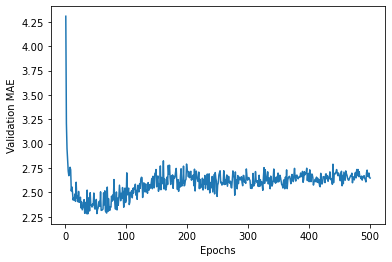

In [67]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


It may be a bit hard to see the plot due to scaling issues and relatively high variance. Let's:

* Omit the first 10 data points, which are on a different scale from the rest of the curve.
* Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.

因为纵轴的范围较大，且数据方差相对较大，所以难以看清这张图的规律。我们来重新绘
制一张图。  

*  删除前 10 个数据点，因为它们的取值范围与曲线上的其他点不同。
*  将每个数据点替换为前面数据点的指数移动平均值，以得到光滑的曲线。

$0.9*EMA(t-1)+0.1*EMA(t)$

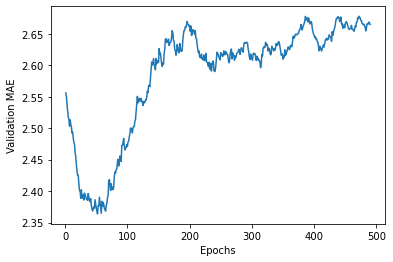

In [68]:
# 指数平滑 EMA
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:]) #这里把前10个元素丢掉

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [69]:
len(smooth_mae_history)

490

In [70]:
np.argmin(smooth_mae_history) # 选取到MAE最小的迭代次数+10（10为前面减去的）

51


According to this plot, it seems that validation MAE stops improving significantly after 80 epochs. Past that point, we start overfitting.

Once we are done tuning other parameters of our model (besides the number of epochs, we could also adjust the size of the hidden layers), we 
can train a final "production" model on all of the training data, with the best parameters, then look at its performance on the test data:

完成模型调参之后（除了轮数，还可以调节隐藏层大小），你可以使用最佳参数在所有训练
数据上训练最终的生产模型，然后观察模型在测试集上的性能。

In [73]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=61, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 997us/step - loss: 19.8285 - mae: 2.7067


In [74]:
test_mae_score

2.7067432403564453

We are still off by about \$2,550.

你预测的房价还是和实际价格相差约 2550 美元

## Wrapping up


Here's what you should take away from this example:

* Regression is done using different loss functions from classification; Mean Squared Error (MSE) is a commonly used loss function for 
regression.
* Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally the concept of "accuracy" 
does not apply for regression. A common regression metric is Mean Absolute Error (MAE).
* When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
* When there is little data available, using K-Fold validation is a great way to reliably evaluate a model.
* When little training data is available, it is preferable to use a small network with very few hidden layers (typically only one or two), 
in order to avoid severe overfitting.

This example concludes our series of three introductory practical examples. You are now able to handle common types of problems with vector data input:

* Binary (2-class) classification.
* Multi-class, single-label classification.
* Scalar regression.

In the next chapter, you will acquire a more formal understanding of some of the concepts you have encountered in these first examples, 
such as data preprocessing, model evaluation, and overfitting.

3.6.5　小结  
下面是你应该从这个例子中学到的要点。  

*  回归问题使用的损失函数与分类问题不同。回归常用的损失函数是均方误差（MSE）。
*  同样，回归问题使用的评估指标也与分类问题不同。显而易见，精度的概念不适用于回
归问题。常见的回归指标是平均绝对误差（MAE）。
*  如果输入数据的特征具有不同的取值范围，应该先进行预处理，对每个特征单独进行
缩放。
*  如果可用的数据很少，使用 K 折验证可以可靠地评估模型。
*  如果可用的训练数据很少，最好使用隐藏层较少（通常只有一到两个）的小型网络，以
避免严重的过拟合。
*  现在你可以处理关于向量数据最常见的机器学习任务了：二分类问题、多分类问题和标
量回归问题。前面三节的“小结”总结了你从这些任务中学到的要点。
*  在将原始数据输入神经网络之前，通常需要对其进行预处理。
*  如果数据特征具有不同的取值范围，那么需要进行预处理，将每个特征单独缩放。
*  随着训练的进行，神经网络最终会过拟合，并在前所未见的数据上得到更差的结果。
*  如果训练数据不是很多，应该使用只有一两个隐藏层的小型网络，以避免严重的过拟合。
*  如果数据被分为多个类别，那么中间层过小可能会导致信息瓶颈。
*  回归问题使用的损失函数和评估指标都与分类问题不同。
*  如果要处理的数据很少，K 折验证有助于可靠地评估模型。